In [1]:
import tensorflow as tf
import pandas as pd
import sklearn
import matplotlib
import keras
import numpy as np
import matplotlib.pyplot as plt
import time


Using TensorFlow backend.


Time for GBR fitting: 1.071
Mean Squared Error for Gradient Boosting: 1.4308962365265214e-05


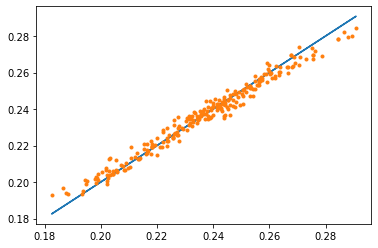

In [2]:
# Train Optimizer function approximator from disturbance to optimal input
# Import training data 
df = pd.read_csv('case4a_data1.csv') # measurement data set does not matter here, since this part is feedforward

dataset = df.values

D = dataset[:,0:8]
U = dataset[:,8]
U1 = D.reshape(-1, 1)


# Split data into traning and validation sets
from sklearn.model_selection import train_test_split
D_train, D_val, U_train, U_val = train_test_split(D, U, test_size=0.25)

# Fit Gradient Boosting 
from sklearn.ensemble import GradientBoostingRegressor

gbOpt = GradientBoostingRegressor(n_estimators=1000)

stime = time.time()
gbOpt.fit(D_train, U_train)
print("Time for GBR fitting: %.3f" % (time.time() - stime))

D_pred_gb = gbOpt.predict(D_val)
mae = np.mean(abs(D_pred_gb - U_val))
mse = np.mean((D_pred_gb - U_val)**2)
print('Mean Squared Error for Gradient Boosting:', mse)

plt.plot(U_val,U_val)
plt.plot(U_val,D_pred_gb,'.')

(749, 7) (250, 7) (749, 8) (250, 8)
Time for GBR fitting: 3.170
Mean Squared Error for Gradient Boosting: 21.099900843941057
(250, 8)


Text(0.5, 1.0, 'UA2')

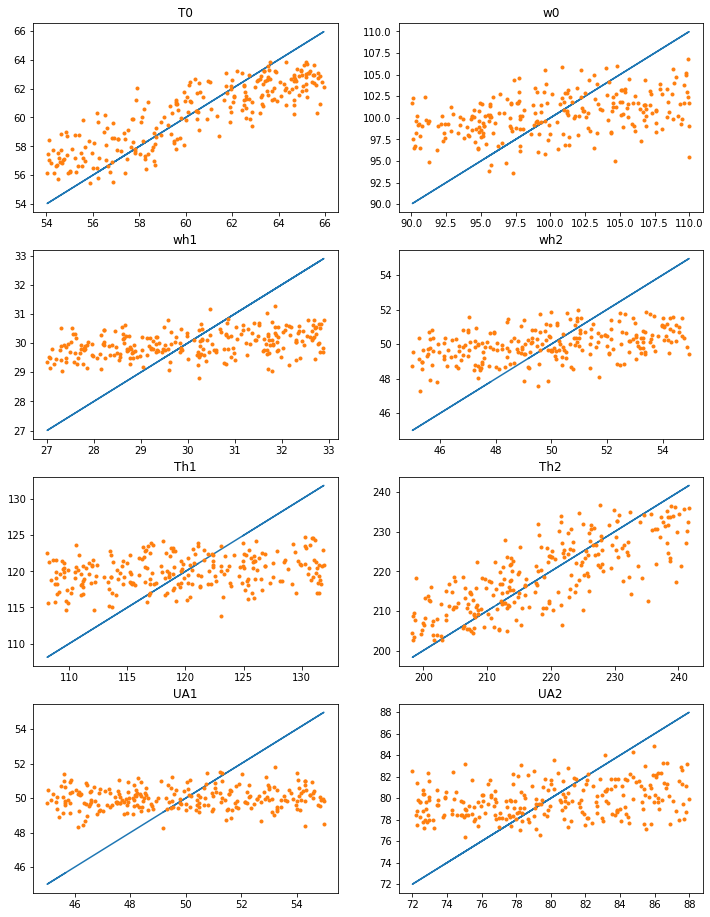

In [3]:
# Train Estimator function approximator from measurements to disturbances
# Import training data 
df = pd.read_csv('case4b_data3.csv') # Measurement data set affects this part.

dataset = df.values

Y = dataset[:,0:7]
D = dataset[:,7:15]

Y_train, Y_val, D_train, D_val = train_test_split(Y, D, test_size=0.25)
print(Y_train.shape, Y_val.shape, D_train.shape, D_val.shape)

# Fit Gradient Boosting 
from sklearn.ensemble import RandomForestRegressor
gbEst = RandomForestRegressor(n_estimators=1000)

stime = time.time()
gbEst.fit(Y_train, D_train)
print("Time for GBR fitting: %.3f" % (time.time() - stime))

D_pred_gb = gbEst.predict(Y_val)
mae = np.mean(abs(D_pred_gb - D_val))
mse = np.mean((D_pred_gb - D_val)**2)
print('Mean Squared Error for Gradient Boosting:', mse)

print(D_val.shape)
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2,
                                      sharex=False, figsize=(12, 16))


ax1.plot(D_val[:,0],D_val[:,0])
ax1.plot(D_val[:,0],D_pred_gb[:,0],'.')
ax1.set_title('T0')


ax2.plot(D_val[:,1],D_val[:,1])
ax2.plot(D_val[:,1],D_pred_gb[:,1],'.')
ax2.set_title('w0')


ax3.plot(D_val[:,2],D_val[:,2])
ax3.plot(D_val[:,2],D_pred_gb[:,2],'.')
ax3.set_title('wh1')


ax4.plot(D_val[:,3],D_val[:,3])
ax4.plot(D_val[:,3],D_pred_gb[:,3],'.')
ax4.set_title('wh2')


ax5.plot(D_val[:,4],D_val[:,4])
ax5.plot(D_val[:,4],D_pred_gb[:,4],'.')
ax5.set_title('Th1')


ax6.plot(D_val[:,5],D_val[:,5])
ax6.plot(D_val[:,5],D_pred_gb[:,5],'.')
ax6.set_title('Th2')


ax7.plot(D_val[:,6],D_val[:,6])
ax7.plot(D_val[:,6],D_pred_gb[:,6],'.')
ax7.set_title('UA1')


ax8.plot(D_val[:,7],D_val[:,7])
ax8.plot(D_val[:,7],D_pred_gb[:,7],'.')
ax8.set_title('UA2')

In [4]:
# ------------ Closed-loop testing starts here ! --------------
# import and initialize model 
import Model as model

df = pd.read_csv('case4a_Testdata3.csv')
dataset = df.values

X_test = dataset[:,0:8]
Y_test = dataset[:,8]
bias =  dataset[:,9:16]
dist = dataset[:,16:24]
Jopt = dataset[:,24]
uopt = dataset[:,25]

print(dataset.shape)

(999, 26)


In [5]:
J = []
U = []
Ju = []

for i in range(999):
    class parameters():
        T0=dist[i,0]    
        w0=dist[i,1]    
        wh1=dist[i,2]  
        wh2=dist[i,3]  
        Th1=dist[i,4]  
        Th2=dist[i,5]  
        UA1=dist[i,6]  
        UA2=dist[i,7]  
    
    par = parameters()

    # initial operating point
    u = 0.5
    meas = model.hex_output(u,par)
    y = [np.array([meas[0],meas[7],meas[5],meas[6],par.w0,par.wh1,par.wh2])]
    print(i)
    
    for j in range(10):
        d = gbEst.predict(y)
        u = gbOpt.predict(d)
        meas = model.hex_output(u,par)
        y = [np.array([meas[0],meas[7],meas[5],meas[6],par.w0,par.wh1,par.wh2] + bias[i,:])]
        
    # save the converged values of cost, input and gradient   
    J.append(meas[7])
    U.append(u)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

-0.005832434352825544


Text(0.5, 1.0, 'Input u')

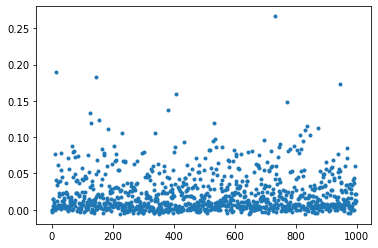

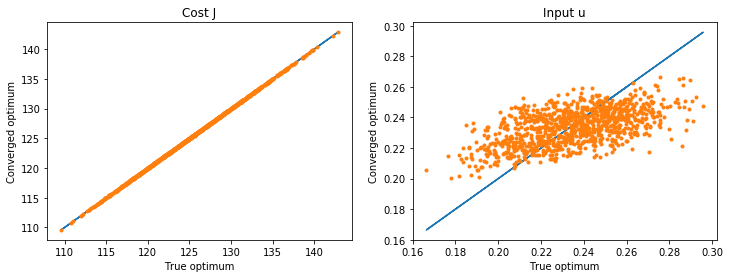

In [6]:
# plot results 
J_cl = np.array(J)
J_cl = J_cl.reshape(999,)

Jopt = np.array(Jopt)
Jopt = Jopt.reshape(999,)

plt.plot(-Jopt-J_cl,'.')
print(min(-Jopt-J_cl))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                                       sharex=False, figsize=(12, 4))

ax1.plot(-Jopt,-Jopt)
ax1.plot(-Jopt,J,'.')
ax1.set_xlabel('True optimum')
ax1.set_ylabel('Converged optimum')
ax1.set_title('Cost J')

ax2.plot(uopt,uopt)
ax2.plot(uopt,U,'.')
ax2.set_xlabel('True optimum')
ax2.set_ylabel('Converged optimum')
ax2.set_title('Input u')